In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
%store -r dropped_columns_fulls
%store -r tcp_protocold
%store -r tcp_protocol1
%store -r newd


In [3]:
newd.dtypes

ts               float64
uid               object
id.orig_h         object
id.orig_p        float64
id.resp_h         object
id.resp_p        float64
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig       float64
local_resp       float64
missed_bytes     float64
history           object
orig_pkts        float64
orig_ip_bytes    float64
resp_pkts        float64
resp_ip_bytes    float64
label             object
dtype: object

In [4]:
lea = LabelEncoder()  
leb = LabelEncoder() 
lec = LabelEncoder() 
led = LabelEncoder() 
lee = LabelEncoder() 
leeq = LabelEncoder() 

newd['uid']=lea.fit_transform(newd['uid'])
newd['id.orig_h']=leb.fit_transform(newd['id.orig_h'])
newd['id.resp_h']=lec.fit_transform(newd['id.resp_h'])
newd['proto']=led.fit_transform(newd['proto'])
newd['conn_state']=lee.fit_transform(newd['conn_state'])
newd['service']=leeq.fit_transform(newd['service'].astype(str))

In [5]:
tcp_protocolcd= newd.query('proto == 1')


In [6]:
tcp_protocolcd

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,317939,1360,60905.0,127613,23.0,1,0,2.998796,0,...,6,0.0,0.0,0.0,S,3.0,180.0,0.0,0.0,PortScan
1,1.525880e+09,456829,1360,44301.0,1061393,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,60.0,0.0,0.0,PortScan
2,1.525880e+09,517514,1360,50244.0,83457,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,60.0,0.0,0.0,PortScan
3,1.525880e+09,961468,1360,34243.0,205149,49560.0,1,0,2.998804,0,...,6,0.0,0.0,0.0,S,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,174473,1360,34840.0,195147,21288.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,528217,1362,41762.0,726752,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,40.0,0.0,0.0,PortScan
1444670,1.532526e+09,1347748,1362,58758.0,608725,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,40.0,0.0,0.0,PortScan
1444671,1.532526e+09,282750,1362,40400.0,802205,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,40.0,0.0,0.0,PortScan
1444672,1.532526e+09,99989,1362,27117.0,95351,23.0,1,0,0,0,...,6,0.0,0.0,0.0,S,1.0,40.0,0.0,0.0,PortScan


In [26]:
from featurewiz import FeatureWiz
import pandas as pd

ImportError: cannot import name 'apply' from 'dask.compatibility' (/home/achintya/anaconda3/lib/python3.8/site-packages/dask/compatibility.py)

In [27]:
#adtcp= tcp_protocold[tcp_protocold['proto']=='tcp']

In [7]:
df_c = pd.get_dummies(tcp_protocolcd, columns=['history'])

In [8]:
df_c.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes',
       ...
       'history_ShArR', 'history_ShDadAf', 'history_ShR', 'history_ShwAadDfr',
       'history_Sr', 'history_^aA', 'history_^c', 'history_^d', 'history_^dDA',
       'history_^r'],
      dtype='object', length=161)

In [9]:
pd.get_dummies(tcp_protocolcd.history)


,Aa,C,CCC,CCCC,D,DFafA,DaFfA,DdA,DdAa,DdAaFf,...,ShArR,ShDadAf,ShR,ShwAadDfr,Sr,^aA,^c,^d,^dDA,^r
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


history – S History of a tcp connection with a SYN without
ACK bit set.

history-C-History of a tcp/udp connection packet with a
bad checksum. 


history – Sr - History of a tcp connection with a SYN request
followed by a RST (reset) flag set to 1 from the
responder. 

history-ShAdDaFf  –History of a tcp connection with a successful
three-way handshake, packets with payload
exchange from both ends and terminated
gracefully. 
 

history – R History of a connection packet with RST bit set. 

history – ShR -History of a tcp connection with SYN, ACK and
RST bits set. 

history – ShAFr- History of a tcp connection that includes
SYN+ACK requests as well as inconsistent
packets of FIN+RST bits set. 

In [10]:
target = 'label'

In [46]:
import featurewiz as FW
outputs = FW.featurewiz(dataname=df_c , target=target, corr_limit=0.70, verbose=2, sep=',', 
header=0, test_data='',feature_engg='', category_encoders='', dask_xgboost_flag=False, nrows=None)

ImportError: cannot import name 'apply' from 'dask.compatibility' (/home/achintya/anaconda3/lib/python3.8/site-packages/dask/compatibility.py)

In [11]:
ads= df_c.drop('label', axis=1)

In [12]:
ads

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,history_ShArR,history_ShDadAf,history_ShR,history_ShwAadDfr,history_Sr,history_^aA,history_^c,history_^d,history_^dDA,history_^r
0,1.525880e+09,317939,1360,60905.0,127613,23.0,1,0,2.998796,0,...,0,0,0,0,0,0,0,0,0,0
1,1.525880e+09,456829,1360,44301.0,1061393,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.525880e+09,517514,1360,50244.0,83457,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.525880e+09,961468,1360,34243.0,205149,49560.0,1,0,2.998804,0,...,0,0,0,0,0,0,0,0,0,0
4,1.525880e+09,174473,1360,34840.0,195147,21288.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,528217,1362,41762.0,726752,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444670,1.532526e+09,1347748,1362,58758.0,608725,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444671,1.532526e+09,282750,1362,40400.0,802205,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1444672,1.532526e+09,99989,1362,27117.0,95351,23.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tcpcols = ads.columns
ztcp = ads.values

In [14]:
tcpcols

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes',
       ...
       'history_ShArR', 'history_ShDadAf', 'history_ShR', 'history_ShwAadDfr',
       'history_Sr', 'history_^aA', 'history_^c', 'history_^d', 'history_^dDA',
       'history_^r'],
      dtype='object', length=160)

In [15]:
def tcpnorm(tcpcols, ztcp):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(ztcp)
    tcpnormalized = pd.DataFrame(x_scaled, columns = tcpcols )
    return tcpnormalized

In [16]:
norma_tcp=tcpnorm(tcpcols, ztcp)

In [18]:
ad=norma_tcp[['missed_bytes', 'history_ShADadttfF', 'conn_state']]
ad8= norma_tcp[['missed_bytes', 'history_ShAdfDr', 'resp_pkts']]

In [ ]:
ad1= df_c[['history_ShAdfDr', 'history_ShAdDaf', 'history_ShADadttfF' ]]

In [68]:
ad2= df_c[['history_ShADadttfF', 'history_ShAdfDr', 'service' ]]
ad3= df_c[['history_S', 'id.orig_h', 'conn_state']]

In [55]:
ad4= df_c[['history_ShAdDaFf', 'history_ShADadttfF', 'missed_bytes', 'orig_ip_bytes', 'id.orig_h', 'resp_bytes', 'id.resp_h', 'history_Sr', 'history_ShAdfDr', 'history_ShAdDaf', 'conn_state', 'history_ShAdDaR', 'history_ShAr', 'history_ShR']]

In [56]:
ad5= df_c[['history_ShAdfDr', 'resp_pkts', 'history_ShAdDaf']]

In [57]:
ad6= df_c[['resp_pkts', 'conn_state', 'resp_bytes']]

In [58]:
ad7= df_c[['missed_bytes', 'history_ShAdfDr', 'resp_pkts', 'conn_state', 'resp_bytes', 'orig_ip_bytes', 'id.resp_p','id.resp_h', 'history_ShAdDaf', 'history_Sr']]

In [59]:
from sklearn.cluster import KMeans
from numpy import unique
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.decomposition import PCA


In [60]:
def elbow(ad):
    wss = []
    K = range(1,10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(ad)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total within Sum of Squares")
    plt.title("TCP-Optimal number of clusters")
    #plt.xlim(xmin=0)
    plt.ticklabel_format(useOffset=True)


    plt.show()
   

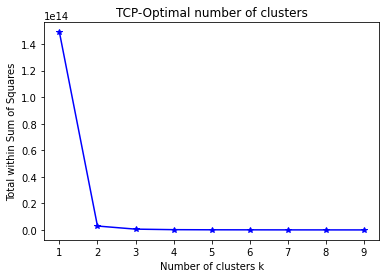

In [61]:
elbow(ad2)

In [ ]:
elbow(ad1)

In [ ]:
elbow(ad2)

In [ ]:
elbow(ad3)

In [ ]:
elbow(ad4)

In [ ]:
elbow(ad5)

In [ ]:
elbow(ad6)

In [ ]:
elbow(ad7)

In [ ]:
elbow(ad8)

In [ ]:
'''
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#reduced_features = pca.fit_transform(udp_norm)
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(tcp_norm)
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(reduced_features)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    tcp_protocol1['label'] = label
    ax = plt.axes()

    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
    ax.set_title('TCP-Kmeans + PCA algorithms plot cluster'+ "-"  + str(cluster))
    plt.xlabel([])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    
    return  tcp_protocol1


'''

In [80]:
Tcp_protocol= tcp_protocol1.copy()
Tcp_protocol1=tcp_protocol1.copy()
Tcp_protocol2=tcp_protocol1.copy()
Tcp_protocol3=tcp_protocol1.copy()

Tcp_protocol4=tcp_protocol1.copy()
Tcp_protocol5=tcp_protocol1.copy()

Tcp_protocol6=tcp_protocol1.copy()
Tcp_protocol7=tcp_protocol1.copy()
Tcp_protocol8=tcp_protocol1.copy()
#Tcp_protocol9=tcp_protocol1.copy()


In [70]:
Tcp_protocol

,ts,uid,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CDe43c1PtgynajGI6,tcp,-,2.998796,0,0,S0,3.0,180.0,0.0,0.0,PortScan
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
2,1.525880e+09,CMBrup3BLXivSp4Avc,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,tcp,-,2.998804,0,0,S0,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,C7USrA15nFVkniMqC5,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444671,1.532526e+09,CC83RoUd9RLFuTL81,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan


In [71]:
def kmeancluster(cluster, ad, Tcp_protocol):
    
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++', random_state=123)
    label = kmeans.fit_predict(ad)
    centers = np.array(kmeans.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    Tcp_protocol['cluster']= kmeans.labels_
    seedfsd1= Tcp_protocol[['label', 'cluster']]
    ax1 = plt.axes()
    
    sns.histplot(binwidth=0.5, x="label", hue="cluster", data=seedfsd1, stat="density", shrink=0.3, multiple="stack", common_norm=False)
    #sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax1.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs probability density plot')
    plt.xticks(rotation=90)
    
    plt.figure(figsize=(6,8))
    ax2=Tcp_protocol.groupby('cluster')['label'].value_counts().unstack().plot.bar()
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(title="Clusters")
    ax2.set_ylabel("Count")
    ax2.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and label.')
    plt.gcf().set_size_inches(6, 5)
    return  Tcp_protocol

    

,ts,uid,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,cluster
0,1.525880e+09,CDe43c1PtgynajGI6,tcp,-,2.998796,0,0,S0,3.0,180.0,0.0,0.0,PortScan,0
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan,0
2,1.525880e+09,CMBrup3BLXivSp4Avc,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan,0
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,tcp,-,2.998804,0,0,S0,3.0,180.0,0.0,0.0,Benign,0
4,1.525880e+09,C7USrA15nFVkniMqC5,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan,0
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan,0
1444671,1.532526e+09,CC83RoUd9RLFuTL81,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan,0
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan,0


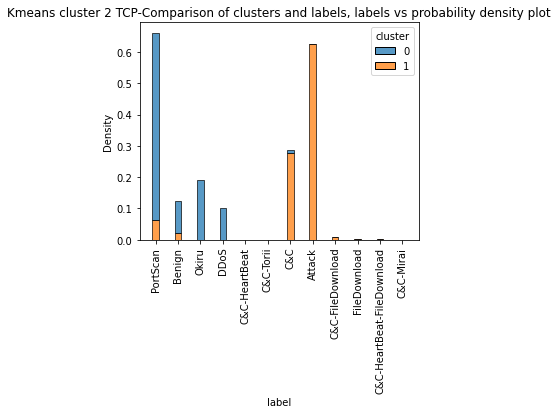

<Figure size 432x576 with 0 Axes>

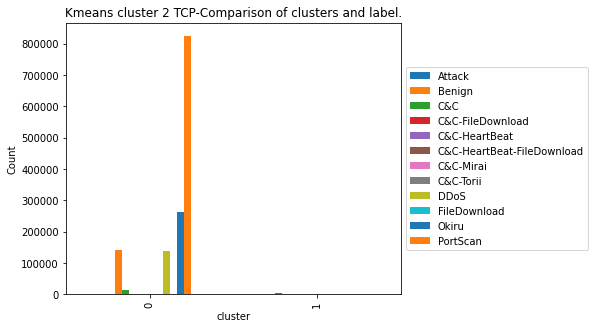

In [72]:
kmeancluster(2, ad2, Tcp_protocol)

In [ ]:
kmeancluster(2, ad1, Tcp_protocol1)

In [ ]:
kmeancluster(2, ad2, Tcp_protocol2)

In [ ]:
kmeancluster(2, ad3, Tcp_protocol3)

In [ ]:
kmeancluster(2, ad4, Tcp_protocol4)

In [ ]:
kmeancluster(2, ad5, Tcp_protocol5)

In [ ]:
kmeancluster(2, ad6, Tcp_protocol6)

In [ ]:
kmeancluster(3, ad7, Tcp_protocol7)

In [ ]:
kmeancluster(2, ad8, Tcp_protocol8)

In [73]:
def groud_truthad(Tcp_protocol):
    cluster0=Tcp_protocol[Tcp_protocol['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=Tcp_protocol[Tcp_protocol['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=Tcp_protocol[Tcp_protocol['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=Tcp_protocol[Tcp_protocol['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)

def groud_truthad1():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad2():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad3():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)

def groud_truthad4():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad5():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad6():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad7():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad8():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)


In [74]:
groud_truthad(Tcp_protocol)

PortScan         59.760279
Okiru            19.015651
Benign           10.165834
DDoS             10.044222
C&C               0.973187
C&C-HeartBeat     0.025263
Attack            0.013247
C&C-Torii         0.002172
FileDownload      0.000072
C&C-Mirai         0.000072
Name: label, dtype: float64
==================================== cluster0
Attack                        62.617450
C&C                           27.785235
PortScan                       6.426174
Benign                         2.114094
C&C-FileDownload               0.721477
FileDownload                   0.201342
C&C-HeartBeat-FileDownload     0.134228
Name: label, dtype: float64
==================================== cluster1
Series([], Name: label, dtype: float64)
==================================== cluster2
Series([], Name: label, dtype: float64)


In [ ]:
groud_truthad(Tcp_protocol1)

In [ ]:
groud_truthad(Tcp_protocol2)

In [ ]:
groud_truthad(Tcp_protocol3)

In [ ]:
groud_truthad(Tcp_protocol4)

In [ ]:
groud_truthad(Tcp_protocol5)

In [ ]:
groud_truthad(Tcp_protocol6)

In [ ]:
groud_truthad(Tcp_protocol7)

In [ ]:
groud_truthad(Tcp_protocol8)

In [ ]:
sa = tcp_protocol1.reset_index()
sa = tcp_protocol1['cluster']

In [ ]:
sa

In [ ]:

def chunker(seq, size):
    for pos in range(0, len(seq), size):
        yield seq.iloc[pos:pos + size] 

chunk_size = 40000
for i in chunker(sa, chunk_size):
    print(i)
chnk = chunker(sa, chunk_size)

print('\n', chnk)


In [ ]:
def chunker1(seq, size):
    for pos in range(0, len(seq), size):
        yield seq.iloc[pos:pos + size] 

chunk_size = 40000
for i in chunker1(tcp_norm, chunk_size):
    print(i)
    chnk1 = chunker(tcp_norm, chunk_size)

    print('\n', chnk1)


In [ ]:
adhchuk=next(chnk1)
adhchuk1= next(chnk1)
adhchuk2= next(chnk1)
adhchuk3= next(chnk1)
adhchuk4=next(chnk1)
adhchuk5= next(chnk1)
adhchuk6= next(chnk1)
adhchuk7= next(chnk1)
adhchuk8=next(chnk1)
adhchuk10= next(chnk1)


In [ ]:
adhchuk

In [ ]:
adachunk=next(chnk)
adachunk1=next(chnk)
adachunk2=next(chnk)
adachunk3=next(chnk)
adachunk4=next(chnk)
adachnk5=next(chnk)
adachunk6=next(chnk)
adachunk7=next(chnk)
adachunk8=next(chnk)
adachnk9=next(chnk)
adachunk10=next(chnk)


In [ ]:
adachunk

In [ ]:
adhchuk

In [ ]:
adhchuk

In [ ]:
adachnk3

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
def sh(adachunk,adhchuk ):
    silhouette_avg = silhouette_score(adhchuk,adachunk)
    print(silhouette_avg)


In [ ]:
sh(adachunk,adhchuk)


In [ ]:
sh(adachunk1,adhchuk1)

In [ ]:
sh(adachunk2,adhchuk2)

In [ ]:
sh(adachunk3,adhchuk3)

In [ ]:
sh(adachunk4,adhchuk4)

In [ ]:
sh(adachnk5,adhchuk5)

In [ ]:
sh(adachunk6,adhchuk6)

In [ ]:
sh(adachunk7,adhchuk7)

In [ ]:
sh(adachunk8,adhchuk8)

In [ ]:
sh(adachnk9,adhchk9)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 4, 3
def plot(cluster,Tcp_protocol):
    prop_df = (Tcp_protocol['label'].groupby(Tcp_protocol['cluster'])
           .value_counts(normalize=True)
           .rename('percent')
           .reset_index())

    ax2= sns.barplot(x='label', y='percent', hue='cluster', data=prop_df)
    
    plt.figure(figsize=(4,3))
    #ax2=Udp_protocol2.groupby('label')['cluster'].value_counts().unstack().plot.bar()
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(title="Clusters")
    #ax2.set_ylabel("Count")
    ax2.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs percent plot')
    #plt.gcf().set_size_inches(6, 5)
    ax2.tick_params(axis='x', rotation=90)
   # ax2.legend(title='clusters')
    ax2.legend(loc='center left',title='clusters', bbox_to_anchor=(1, 0.5))
    #ax2.legend(loc = "upper right")



    
    return

In [ ]:
plot(2, Tcp_protocol)

In [ ]:
plot(2, Tcp_protocol1)

In [ ]:
plot(2, Tcp_protocol2)

In [ ]:
plot(2, Tcp_protocol3)

In [ ]:
plot(2, Tcp_protocol4)

In [ ]:
plot(2, Tcp_protocol5)

In [ ]:
plot(2, Tcp_protocol6)

In [ ]:
plot(3, Tcp_protocol7)

In [ ]:
plot(2, Tcp_protocol8)

In [ ]:
'''
x, y= 'cluster', 'label'

df1 = tcp_protocol1.groupby(x)[y].value_counts(normalize=True)
df1 = tcp_protocol1.mul(100)
df1 = tcp_protocol1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
'''


In [ ]:
df1

In [ ]:
(tcp_protocol1
.groupby(cluster)[label]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'tcp_protocol1'), x=x,y='percent',hue=y,kind='bar'))

In [ ]:
kmeancluster(3)

In [ ]:
kmeancluster(4)

In [ ]:
kmeancluster(5)

In [ ]:

plt.figure(figsize=(6,8))
ax=tcp_protocol1.groupby('label')['clusterlabel'].value_counts().unstack().plot.bar()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(title="Clusters")
ax.set_ylabel("Count")
plt.gcf().set_size_inches(7, 5)



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


le1 = LabelEncoder()   
tcp_label2=le1.fit_transform(tcp_protocol1['label'])

In [ ]:
s_array2 = tcp_protocol1[["clusterlabel"]].to_numpy()

In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(tcp_label, s_array1,pos_label="positive", average='macro')   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(tcp_label2, s_array2, pos_label="positive", average='macro') 
fpr = 1 - tnr
fnr = 1 - tpr

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
kmeancluster(2)

In [ ]:
kmeancluster(3)

In [ ]:
kmeancluster(4)

In [ ]:
kmeancluster(5)

In [ ]:
tcp_protocol1

In [ ]:
ad5

In [ ]:
'''
algorithm3 = KMeans(n_clusters = 5, init='k-means++',  random_state=123)
algorithm3.fit(udp_norm)
Udp_protocol2['clusterlabel']= algorithm3.labels_


'''

In [ ]:
#seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
#seedfsd.to_csv('ad.csv')

In [ ]:
'''

ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Kmeans-UDP-Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)



'''

In [75]:
Tcp_protocolb= tcp_protocol1.copy()
Tcp_protocolb1=tcp_protocol1.copy()

### Birch algorithms for TCP protocol

In [81]:

def birch(cluster, ad, Tcp_protocolb):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(ad)
    yhat_br = model_br.predict(ad)
    clusters_br = unique(yhat_br)
    Tcp_protocolb['cluster'] = model_br.labels_
    seedfsd3= Tcp_protocolb[['label', 'cluster']]
    ax3=sns.histplot(binwidth=0.5, x="label", hue="cluster", data=seedfsd3, stat="probability", shrink=0.3, multiple="stack", common_norm=False)
    #sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax3.set_title('Birch cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs probability density plot')
    plt.xticks(rotation=90)
    
    plt.figure(figsize=(6,8))
    ax4=Tcp_protocolb.groupby('cluster')['label'].value_counts().unstack().plot.bar()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.legend(title="Clusters")
    ax4.set_ylabel("Count")
    ax4.set_title('Birch cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs count plot')
    plt.gcf().set_size_inches(5, 4)
    return Tcp_protocol



,ts,uid,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.525880e+09,CDe43c1PtgynajGI6,tcp,-,2.998796,0,0,S0,3.0,180.0,0.0,0.0,PortScan
1,1.525880e+09,CJaDcG3MZzvf1YVYI4,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
2,1.525880e+09,CMBrup3BLXivSp4Avc,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,PortScan
3,1.525880e+09,CfHl9r3XMYtDQRrHnh,tcp,-,2.998804,0,0,S0,3.0,180.0,0.0,0.0,Benign
4,1.525880e+09,C7USrA15nFVkniMqC5,tcp,-,-,-,-,S0,1.0,60.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,1.532526e+09,CMeH6R2aua5c5Dd65a,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444670,1.532526e+09,CvqGx33hsXDpDVXa1i,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444671,1.532526e+09,CC83RoUd9RLFuTL81,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan
1444672,1.532526e+09,C4ISld2cuSukEEuQtk,tcp,-,-,-,-,S0,1.0,40.0,0.0,0.0,PortScan


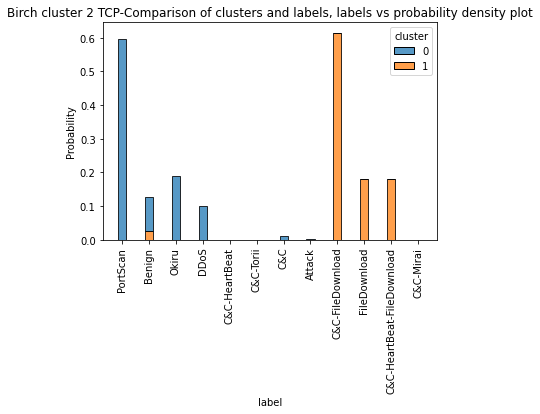

<Figure size 432x576 with 0 Axes>

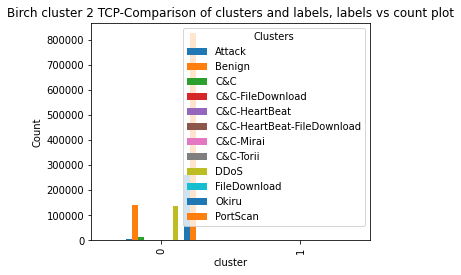

In [82]:
birch(2, ad, Tcp_protocolb)

In [ ]:
birch(2, ad5, Tcp_protocolb5)

In [ ]:
birch(2, ad6, Tcp_protocolb6)

In [ ]:
birch(2, ad8, Tcp_protocolb8)

In [83]:
def bgroud_truthad(Tcp_protocolb):
    cluster0=Tcp_protocolb[Tcp_protocolb['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=Tcp_protocolb[Tcp_protocolb['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=Tcp_protocolb[Tcp_protocolb['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=Tcp_protocolb[Tcp_protocolb['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)

def bgroud_truthad1():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def bgroud_truthad2():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def bgroud_truthad3():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)

def bgroud_truthad4():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def bgroud_truthad5():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def bgroud_truthad6():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def groud_truthad7():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)
def bgroud_truthad8():
    cluster0=tcp_protocol1[tcp_protocol1['cluster'] == 0]['label'].value_counts(normalize=True) * 100
    cluster1=tcp_protocol1[tcp_protocol1['cluster'] == 1]['label'].value_counts(normalize=True) * 100
    cluster2=tcp_protocol1[tcp_protocol1['cluster'] == 2]['label'].value_counts(normalize=True) * 100
    cluster3=tcp_protocol1[tcp_protocol1['cluster'] == 3]['label'].value_counts(normalize=True) * 100
    print(cluster0)
    print('==================================== cluster0')
    print(cluster1)
    print('==================================== cluster1')
    print(cluster2)
    print('==================================== cluster2')
    print(cluster3)


In [84]:
bgroud_truthad(Tcp_protocolb)

PortScan                      59.532840
Okiru                         18.934496
Benign                        10.131458
DDoS                          10.001355
C&C                            1.088397
Attack                         0.282190
C&C-HeartBeat                  0.025156
C&C-Torii                      0.002162
C&C-FileDownload               0.001370
FileDownload                   0.000432
C&C-HeartBeat-FileDownload     0.000072
C&C-Mirai                      0.000072
Name: label, dtype: float64
==================================== cluster0
C&C-FileDownload              61.538462
C&C-HeartBeat-FileDownload    17.948718
FileDownload                  17.948718
Benign                         2.564103
Name: label, dtype: float64
==================================== cluster1
Series([], Name: label, dtype: float64)
==================================== cluster2
Series([], Name: label, dtype: float64)


In [ ]:
bgroud_truthad(Tcp_protocolb5)

In [ ]:
bgroud_truthad(Tcp_protocolb6)

In [ ]:
bgroud_truthad(Tcp_protocolb8)

In [ ]:
def plot2(cluster,Tcp_protocolb):
    prop_df = (Tcp_protocolb['label'].groupby(Tcp_protocolb['cluster'])
           .value_counts(normalize=True)
           .rename('percent')
           .reset_index())

    ax2= sns.barplot(x='label', y='percent', hue='cluster', data=prop_df)
    
    plt.figure(figsize=(6,8))
    #ax2=Udp_protocol2.groupby('label')['cluster'].value_counts().unstack().plot.bar()
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.set_title('Birch cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs percent plot')
    #plt.gcf().set_size_inches(6, 5)
    ax2.tick_params(axis='x', rotation=90)

    return

In [ ]:
plot2(2, Tcp_protocolb)

In [ ]:
plot2(2, Tcp_protocolb5)

In [ ]:
plot2(2, Tcp_protocolb6)

In [ ]:
plot2(2, Tcp_protocolb8)

In [ ]:
'''

ax = sns.countplot(x="clusterlabel", hue='label', data=tcp_protocol1)
ax.set(ylabel='Bar Count', title='Bar Count and Percent of Total')

# add annotations
for c in ax.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h/tcp_protocol1.label.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

'''


In [ ]:
tcp_protocol1.to_csv('ad.csv')

In [ ]:
tcp_protocol1['label'].unique()

In [ ]:
s_array1 = tcp_protocol1[["clusterlabel"]].to_numpy()

In [ ]:
s_array1

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


le1 = LabelEncoder()   
tcp_label=le1.fit_transform(tcp_protocol1['label'])

In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(tcp_label, s_array1, average='macro')   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(tcp_label, s_array1, pos_label="positive", average='macro') 
fpr = 1 - tnr
fnr = 1 - tpr

In [ ]:
fpr

In [ ]:
birch(4)

In [ ]:
birch(5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
sns.histplot(binwidth=0.6, x="label", hue="label", data=tcp_protocol1, stat = "count", shrink=.2, common_norm=True)
ax.set_title('UDP protocol labels count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(tcp_norm)
def brichcluster(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(tcp_norm)
    label =  model_br.predict(tcp_norm)
    #centers = np.array( model_br.cluster_centers_)
    

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    ax = plt.axes()
    #Udp_protocol2['clusterlabel']= model_br.predict(udp_norm)
    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
    ax.set_title('TCP-Brich + PCA algorithms plot cluster'+ "-"  + str(cluster))

    plt.xlabel([])
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    return 

In [ ]:
brichcluster(2)

In [ ]:
brichcluster(3)

In [ ]:
brichcluster(4)

In [ ]:
brichcluster(5)

### leave after this cell

In [ ]:
from sklearn.decomposition import PCA

reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udpfeatures)

In [ ]:
model_br = Birch(threshold=0.01, n_clusters=5)
clusters=model_br.fit(udpfeatures)


In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("UDP Brich clustering")
plt.legend()
plt.show()

## leave below cell

In [ ]:
udp_norm1= udp_norm.iloc[:, 0:2]
udp_norm2= udp_norm.iloc[:, [0,3]]
udp_norm3= udp_norm.iloc[:, [0,4]]
udp_norm4= udp_norm.iloc[:, [0,5]]
#udp_norm5= udp_norm.iloc[:, [0,6]]


In [ ]:
udp_normorig_bytes1= udp_norm.iloc[:, [1,2]]
udp_normorig_bytes2= udp_norm.iloc[:, [1,3]]
udp_normorig_bytes3= udp_norm.iloc[:, [1,4]]
udp_normorig_bytes4= udp_norm.iloc[:, [1,5]]

In [ ]:
udp_normresp_bytes1= udp_norm.iloc[:, [2,3]]
udp_normresp_bytes2= udp_norm.iloc[:, [2,4]]
udp_normresp_bytes3= udp_norm.iloc[:, [1,5]]


In [ ]:
udp_normconn_state1= udp_norm.iloc[:, [3,4]]
udp_normconn_state2= udp_norm.iloc[:, [3,5]]

In [ ]:
udp_normorig_pkts1=udp_norm.iloc[:, [4,5]]

In [ ]:
udp_normconn_state1

In [ ]:
udp_norm1w= udp_norm.iloc[:, 1:3]

In [ ]:
udp_norm2w=udp_norm.iloc[:, [1,3]]

In [ ]:
udp_norm2w

In [ ]:


def ad():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def addd():
    wss = []
    K = range(2,11)
    for k1 in K1:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def adddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def addddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes4():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def orig_pkts1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_pkts1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

In [ ]:
ad()

In [ ]:
conn_state1()

In [ ]:
conn_state2()

In [ ]:
orig_pkts1()

In [ ]:
resp_bytes1()

In [ ]:
resp_bytes2()

In [ ]:
resp_bytes3()

In [ ]:
orig_bytes1()

In [ ]:
orig_bytes2()

In [ ]:
orig_bytes3()

In [ ]:
orig_bytes4()

In [ ]:
ad()

In [ ]:
addd()

In [ ]:
adddd()

In [ ]:
addddd()

In [ ]:
def add():
    k_means = KMeans(n_clusters=5, init = 'k-means++')
    k_means.fit(udp_normconn_state1)
    y_kmeans= kmeans.fit_predict(udp_normconn_state1)
    print(y_kmeans)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state1['conn_state'], udp_normconn_state1['orig_pkts'], c=k_means.labels_, s=100)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('orig_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
    return y_kmeans
    

In [ ]:
add()

In [ ]:
def a():
    k_means = KMeans(n_clusters=5, init = 'k-means++', max_iter=300)
    k_means.fit(udp_normconn_state2)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state2['conn_state'], udp_normconn_state2['resp_pkts'], c=k_means.labels_, s=200)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('resp_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
   


In [ ]:
a()

In [ ]:

algorithm3 = (KMeans(n_clusters = 5, init='k-means++', max_iter=300))
algorithm3.fit(udp_normconn_state2)
Udp_protocol2['clusterlabel']= algorithm3.labels_


In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(udp_normconn_state1)




plt.scatter(udp_normconn_state1[y_kmeans == 0]['conn_state'], udp_normconn_state1[y_kmeans == 0]['orig_pkts'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(udp_normconn_state1[y_kmeans == 1]['conn_state'], udp_normconn_state1[y_kmeans == 1]['orig_pkts'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(udp_normconn_state1[y_kmeans == 2]['conn_state'], udp_normconn_state1[y_kmeans == 2]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(udp_normconn_state1[y_kmeans == 3]['conn_state'], udp_normconn_state1[y_kmeans == 3]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 4')
plt.scatter(udp_normconn_state1[y_kmeans == 4]['conn_state'], udp_normconn_state1[y_kmeans == 4]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

In [ ]:
add()seedfsd

In [ ]:

Udp_protocol2['clusterlabel']= k_means.labels_

In [ ]:
np.unique(k_means.labels_)

In [ ]:
centers = k_means.cluster_centers_

centers

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(udp_norm2w['orig_bytes'], 
            udp_norm2w['conn_state'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=300) 

plt.xlabel('duration')
plt.ylabel('orig_bytes')
plt.title('5 Cluster K-Means')

plt.show()

In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(udp_norm1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
Udp_protocol2

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    print('*** Iterate over columns in dataframe using Column Names ***"')


In [ ]:
columnSeriesObj

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    

In [ ]:
udp_norm1

In [ ]:
#da= udp_norm.iloc[0:5000]

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(udp_norm)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(udp_norm.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [ ]:
wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(udp_norm)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

In [ ]:
def find_optimal_cluster_number_kmeans(udp_norm, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(udp_norm) 
        silhouette_score = metrics.silhouette_score(udp_norm, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [ ]:
find_optimal_cluster_number_kmeans(udp_norm, 2, 11, random_state=123)

In [ ]:
data1 = udp_norm.copy()

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
#data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=5, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(data1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
%store -r Udp_protocol2

In [ ]:
seedfsd= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
seedfsd

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
from sklearn.cluster import Birch
from numpy import unique
model_br = Birch(threshold=0.02, n_clusters=3)
model_br.fit(tcp_norm)
#
yhat_br = model_br.predict(data1)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
Udp_protocol2['clusterlabel'] = model_br.labels_

In [ ]:
labels_br

In [ ]:
score_br = metrics.silhouette_score(data1,labels_br)

print("Score of Birch = ", score_br)

In [ ]:
Udp_protocol2

In [ ]:
seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import OPTICS
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data1)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

In [ ]:
labels_op

In [ ]:
score_op = metrics.silhouette_score(data1,labels_op)

print("Score of Mean Shift = ", score_op)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
score_mini = metrics.silhouette_score(data1,labels_mini)

print("Score of Birch = ", score_mini)

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
Udp_protocol2['clusterlabel'] = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
seedfsd2= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd2, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import MeanShift
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data1)
#
yhat_ms = model_ms.predict(data1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_